In [1]:
### V1, 02.01.2017, Celine ###
####### Reads and visualizes ply meshes and computes their sulcal shades. #######
####### using functions open_ply, normal and normals from r03ert0 (Github) #######
####### and create_fig from juhuntenburg (Github) #######

In [1]:
%pylab inline

import numpy
import pylab
import plot_surf_stat_map_3 as plot_surf
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Open mesh in ply format
def open_ply(filepath):
    f=open(filepath,'r');
    i=0;
    ip=0;
    it=0;
    np=0;
    nt=0;
    for str in f:
        i+=1;
        arr=str.split(" ");
        if(arr[0]=="element" and arr[1]=="vertex"):
            np=int(arr[2]);
            p=numpy.zeros((np,3));
        elif(arr[0]=="element" and arr[1]=="face"):
            nt=int(arr[2]);
            t=numpy.zeros((nt,3));
        elif(i>=11 and i<11+np):
            p[ip,0]=float(arr[0]);
            p[ip,1]=float(arr[1]);
            p[ip,2]=float(arr[2]);
            ip+=1;
        elif(i>=11+np and i<11+np+nt):
            t[it,0]=int(arr[1]);
            t[it,1]=int(arr[2]);
            t[it,2]=int(arr[3]);
            it+=1;
    mesh={};
    mesh["np"]=np;
    mesh["nt"]=nt;
    mesh["p"]=p;
    mesh["t"]=t;
    return mesh;

In [16]:
# Normal of triangle a,b,c
def normal(a,b,c):
    v=numpy.cross(b-a,c-a)
    n=v/numpy.linalg.norm(v)
    return n;

# Compute the normals for each vertex in mesh
def normals(mesh):
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"].astype(int);
    n=numpy.zeros((np,3));
    for i in range(0,nt):
        nn=normal(p[t[i,0]],p[t[i,1]],p[t[i,2]]);
        n[t[i,0]]=numpy.add(n[t[i,0]],nn);
        n[t[i,1]]=numpy.add(n[t[i,1]],nn);
        n[t[i,2]]=numpy.add(n[t[i,2]],nn);
    for i in range(0,np):
        n[i]=n[i]/numpy.linalg.norm(n[i]);
    return n;

In [10]:
path = 'E:/Celine/Ferret_b2n/F25_P2/'
fmesh = path+'P2_F25_mesh.ply'
mesh = open_ply(fmesh)

In [11]:
np=mesh["np"];
nt=mesh["nt"];
p=mesh["p"];
t=mesh["t"];

In [15]:
t[0].astype(int)

array([0, 2, 1])

In [17]:
n = []
n = normals(mesh)

In [18]:
# vector point of view for shades // ex: [1,0,0] light from the front of the brain (X orientation)
vect = [1,0,0]
# if dot(a,b)=0 then a and b orthogonals
sulc = dot(n, vect)

In [19]:
data_ = ones(np)

plot_surf_stat_map_3.py:109: RuntimeWarning: invalid value encountered in divide
  stat_map_faces = stat_map_faces / (vmax-vmin)
C:\Users\cdelettre\Anaconda2\lib\site-packages\matplotlib\colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


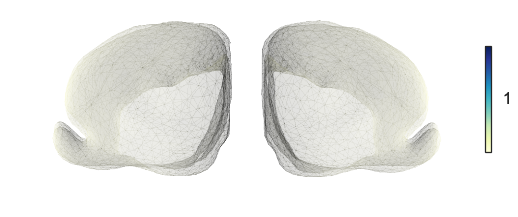

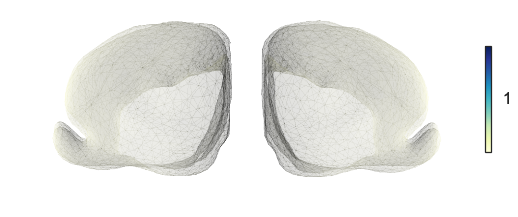

In [20]:
sns.set_context('poster')
sns.set_style("white")

plot_surf.create_fig( data=data_, coords=p, faces=t, azims=[0, 180], elevs=[0, 0], sulc=sulc, cmap='YlGnBu', cbar=True, alpha=0.1)
#plt.savefig(path+'P16_F21_sulc_fig.png')

#plt.scatter(endpoints[0],endpoints[1])

In [12]:
##### Endpoints projection and visualization of the surface #####
                    # Work in progress #

In [13]:
path2 = '/Users/ghfc/Desktop/'

In [21]:
fendpoints = path+'F25_P2_endpoints.txt'
endpoints = loadtxt(fendpoints)

In [25]:
len(endpoints)/100

5532

In [23]:
def findClosestPoint(ep, mesh):
    
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"];
    
    n = normals(mesh)
    
    d = 1000000
    
    for i in range(np-1):
            v = ep - p[i]
            d1 = absolute(dot(v, n[i]))
            
            if d1 < d:
                d = d1
                cp = p[i]
                point = i
    #print point,d
    return point,d

In [32]:
ep = zeros((len(endpoints)/100,2))

for x in range((len(endpoints)/100)):

    ep[x] =findClosestPoint(endpoints[x],mesh)

In [18]:
ep[0:10]

array([[  5.73900000e+03,   2.99160794e-03],
       [  4.02400000e+03,   1.62963577e-04],
       [  2.38000000e+03,   2.95286381e-03],
       [  4.42800000e+03,   1.46534749e-03],
       [  3.56400000e+03,   9.73699110e-03],
       [  9.42400000e+03,   6.07367908e-04],
       [  1.92700000e+03,   4.02428434e-03],
       [  1.16900000e+03,   1.19639621e-03],
       [  9.28500000e+03,   3.65222170e-03],
       [  4.79800000e+03,   2.77946064e-04]])

In [28]:
ep[:,1].max()

0.047252871893868842

In [47]:
ep.shape

(99, 2)

In [29]:
pep =[]

p0 =[]
p1 =[]
p2 =[]
p3 =[]
p4 =[]

maxi = ep[:,1].max()
mini = ep[:,1].min()

thr=5
step = (maxi-mini)/thr

for pp in range(len(ep)):
    if ep[pp,1]<mini+step and ep[pp,1]>=mini:
        p0.append(ep[pp,0])
    elif ep[pp,1]<mini+2*step and ep[pp,1]>=mini+step:
        p1.append(ep[pp,0])
    elif ep[pp,1]<mini+3*step and ep[pp,1]>=mini+2*step:
        p2.append(ep[pp,0])
    elif ep[pp,1]<mini+4*step and ep[pp,1]>=mini+3*step:
        p3.append(ep[pp,0])
    elif ep[pp,1]<=mini+5*step and ep[pp,1]>=mini+4*step:
        p4.append(ep[pp,0])
    

pep.append(p0)
pep.append(p1)
pep.append(p2)
pep.append(p3)
pep.append(p4)


In [24]:
type(pep)

list

In [14]:
for i in ep:
    data_[i] = 100

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


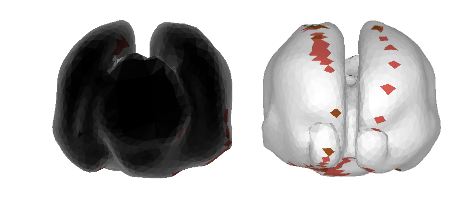

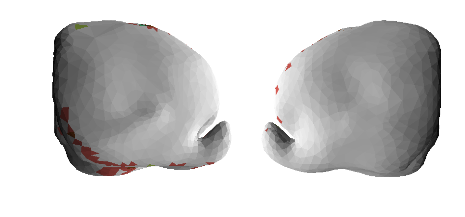

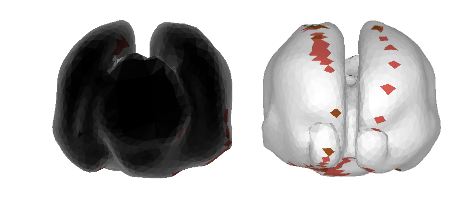

In [31]:
sns.set_context('poster')
sns.set_style("white")

plot_surf.create_fig( coords=p, faces=t, labels=pep, azims=[90, 270], elevs=[0, 0], sulc=sulc, cpal='hls')
plot_surf.create_fig( coords=p, faces=t, labels=pep, azims=[0, 180], elevs=[0, 0], sulc=sulc, cpal='hls')
#plt.savefig(path+'P16_F21_sulc_fig.png')

#plt.scatter(endpoints[0],endpoints[1])

In [50]:
p[:,0]

array([  9.37835,   8.7263 ,   8.0581 , ...,   9.91751,  10.4326 ,  11.1608 ])